In [1]:
#Load necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Load and read the data
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/data_cleaned.csv'
data = pd.read_csv(data_dir,index_col=0)
data.head()

Mounted at /content/drive


,price,bed,bath,house_size,city_enc,zip_enc,state_Puerto Rico,state_Massachusetts,state_Connecticut,state_New Jersey,state_New York,state_New Hampshire,state_Vermont,state_Rhode Island,state_Wyoming,state_Maine,state_Georgia,state_Pennsylvania,state_Delaware
0,105000.0,3.0,2.0,920.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80000.0,4.0,2.0,1527.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
2,67000.0,2.0,1.0,748.0,114611.845711,113752.971131,1,0,0,0,0,0,0,0,0,0,0,0,0
3,145000.0,4.0,2.0,1800.0,199673.107143,168305.581318,1,0,0,0,0,0,0,0,0,0,0,0,0
5,179000.0,4.0,3.0,2520.0,196619.034149,144958.974359,1,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#Split training and test sets
X = data.drop(columns="price")           
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (57042, 18)
X Test  :  (14261, 18)
Y Train :  (57042,)
Y Test  :  (14261,)


In [4]:
#Load decision tree lib
from sklearn.tree import DecisionTreeRegressor

Following are simple markdown of parameters in Decision Tree Regressor

(criterion='mse/mae'  
splitter='best', #best for lesser samples, random for larger sets  
max_depth=None, #Increase from 3  
min_samples_split=2, #We have a relatively big set, we can increase this  
min_samples_leaf=1, #normally 5 for 100k samples  
min_weight_fraction_leaf=0.0,  
max_features=None, #feature lesser than 50, use None(All features)  
random_state=None,  
max_leaf_nodes=None, # we don't have too many features, no need to worry about  
min_impurity_decrease=0.0, min_impurity_split=None, presort=False)

In [5]:
#Basic situation using mse criterion(squared_error)
DT = DecisionTreeRegressor(criterion='squared_error')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.7231249302439362
DecisionTreeRegressor MSE: 385745561666.5414


In [6]:
#Try different splitter
DT = DecisionTreeRegressor(criterion='squared_error', splitter='best')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.7256192310424477
DecisionTreeRegressor MSE: 382270472835.5577


In [7]:
#Try different splitter
DT = DecisionTreeRegressor(criterion='squared_error', splitter='random')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.7025763918127925
DecisionTreeRegressor MSE: 414374023974.5836


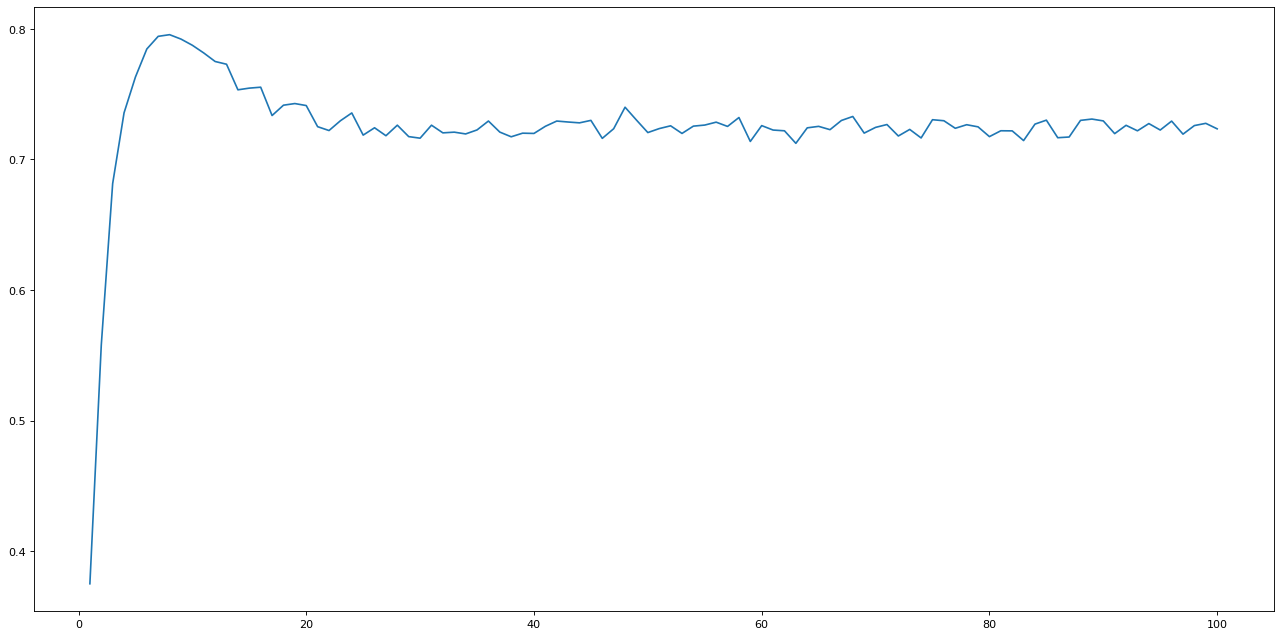

In [8]:
#Finding the best max_depth for model
test = []
for i in range(100):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = i+1)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,101), test)
plt.show()

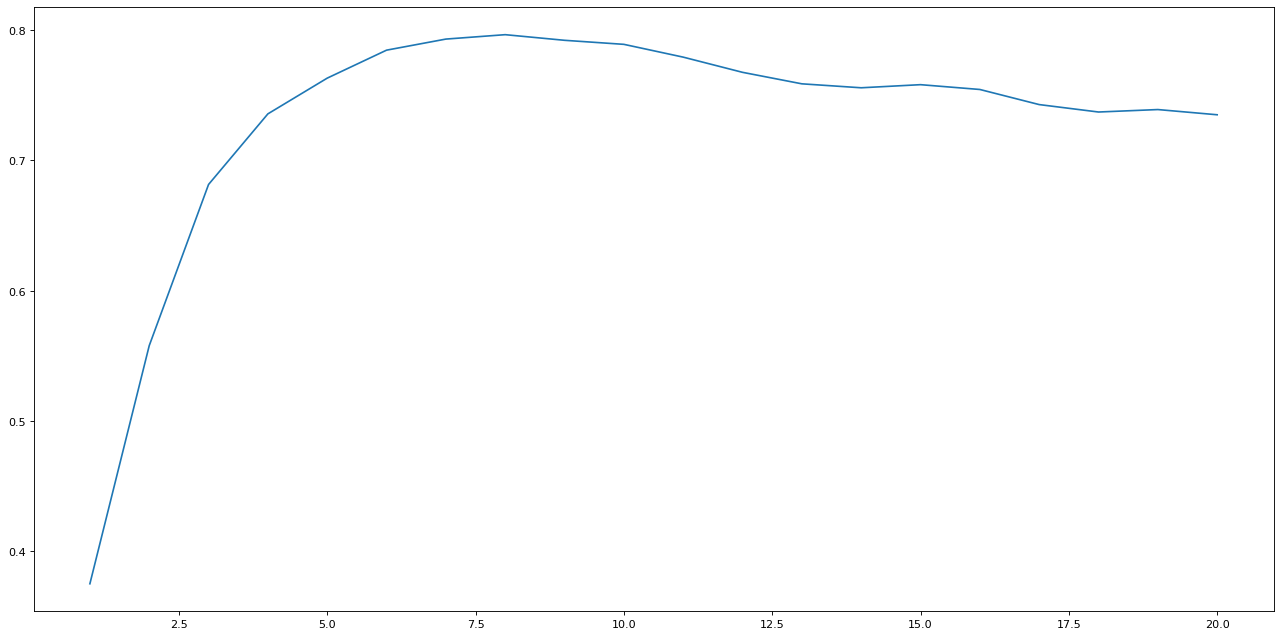

In [9]:
#Finding the best max_depth for model
test = []
for i in range(20):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = i+1)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,21), test)
plt.show()

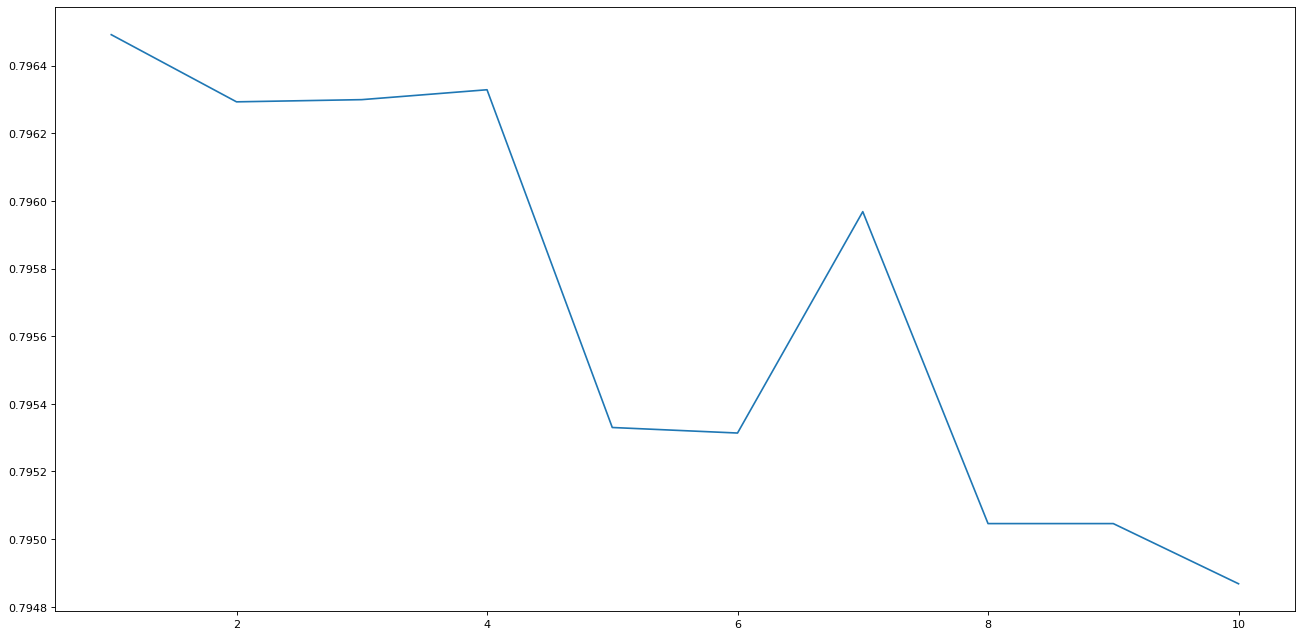

In [10]:
#Finding the best min_samples_split for model
test = []
for i in range(10):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, min_samples_split=i+2)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

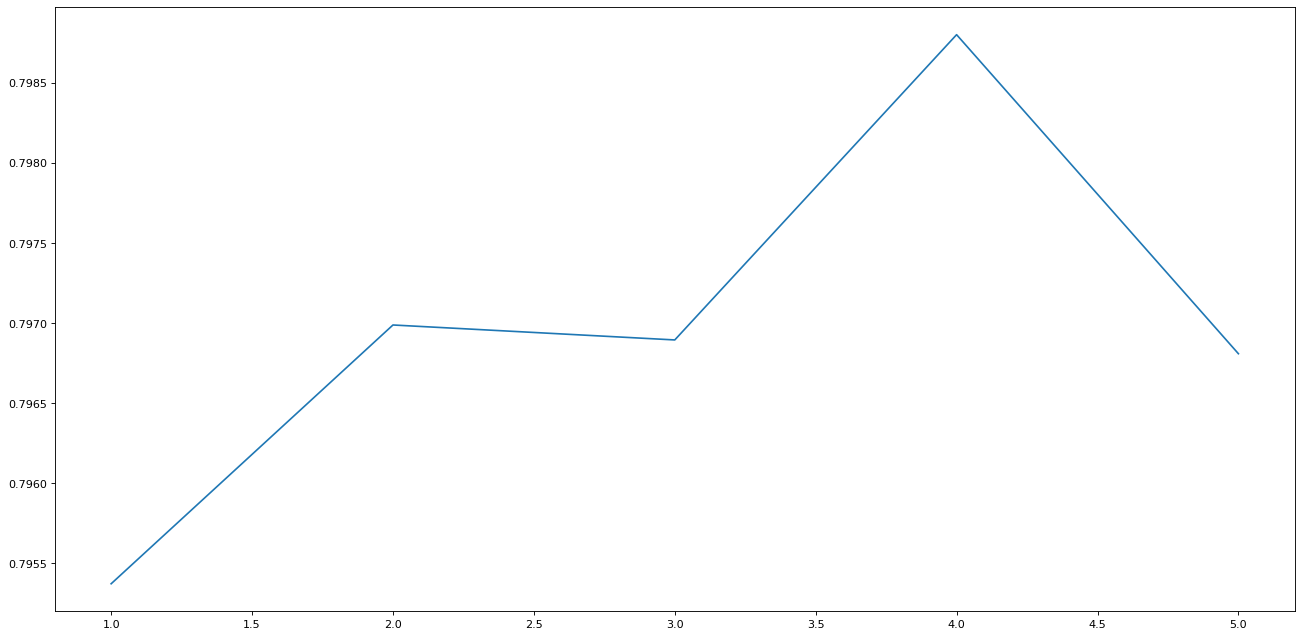

In [11]:
#Finding the best min_samples_leaf for model
test = []
for i in range(5):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, min_samples_split=3, min_samples_leaf=i+1)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,6), test)
plt.show()

In [12]:
#Final Performance
DT = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, min_samples_split=3, min_samples_leaf=4)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.7987989726511637
DecisionTreeRegressor MSE: 280315607219.3179
